#### Doing EDA Analysis of Titanic Dataset and Preparing it for ML Model Training

# Step1. Importing essentials

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')# makes plots look nicer
# %matplotlib inline #shows your plots inside the notebook.

# Step2. Loading the DataSet

In [2]:
df = pd.read_csv('titanic.csv')

# Step3. Visualizing the Data

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step4. Understand the Data

In [ ]:
df.shape
# Total rows and cols

(891, 12)

In [10]:
df.columns
#see the columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.info()
#info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
#basic stats for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#count the missing values per column
df.isnull().sum()
#.isna() is same as .isnull()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Step 5. Data Cleaning

In [18]:
#we remove the cabin column as it contains too many null values
df.drop('Cabin',axis=1,inplace=True)

In [23]:
#handling the missing values in Age
mask = df['Age'].median()
df['Age'].fillna(mask,inplace=True)

C:\Users\Akshit kumar\AppData\Local\Temp\ipykernel_2208\99152267.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mask,inplace=True)


In [25]:
#handling the missing values in embarked 
# here we use .mode() to fill it with the most frequent value
#here.mode() can return multile valeus that is why we use[0] to use the first value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
#checking if any other missing values are still left
df.isna().sum()
#no null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#converting the datatype of sex and embarked into categorical as for fewer values it is better and fast
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Step5. Visual EDA (Exploratory Data Analysis)

Text(0.5, 1.0, '0->Not Survived, 1-> Survived')

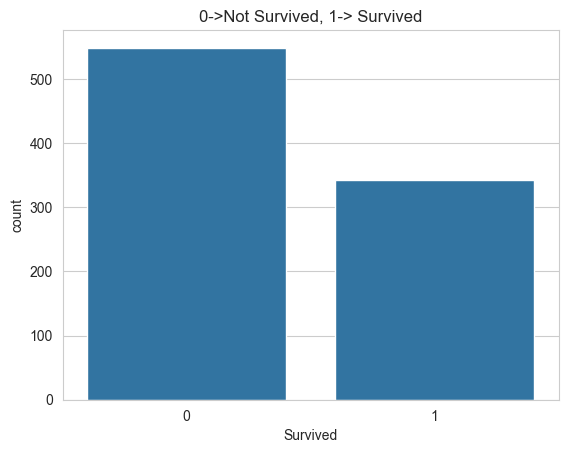

In [36]:
#survival count
sns.countplot(x='Survived',data=df)
plt.title('0->Not Survived, 1-> Survived')

Text(0.5, 1.0, '0->Not Survived, 1-> Survived')

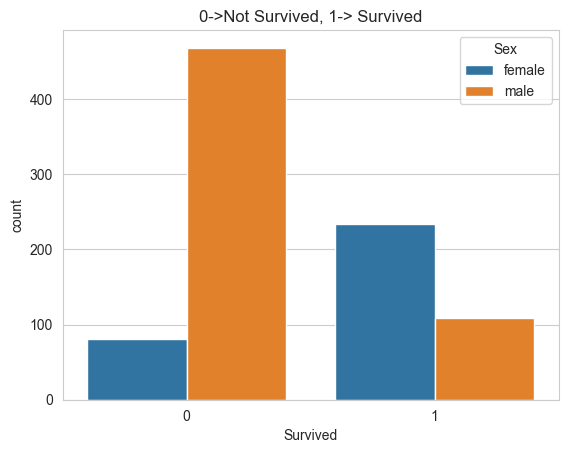

In [37]:
#survival count by gender
sns.countplot(x='Survived',data=df,hue=df['Sex'])
plt.title('0->Not Survived, 1-> Survived')

Text(0.5, 1.0, '0->Not Survived, 1->Survived')

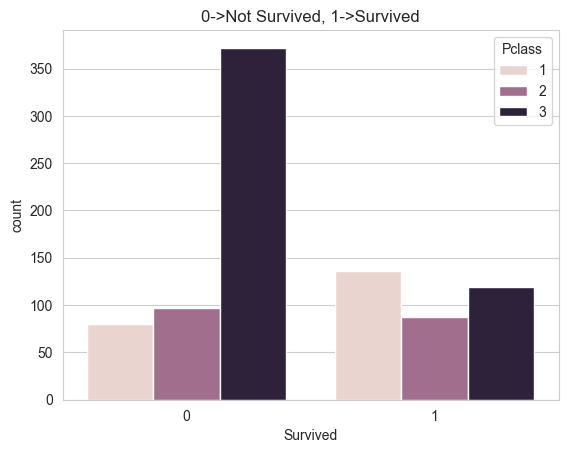

In [40]:
#survival count by pclass
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title("0->Not Survived, 1->Survived")

<Axes: xlabel='Age', ylabel='Count'>

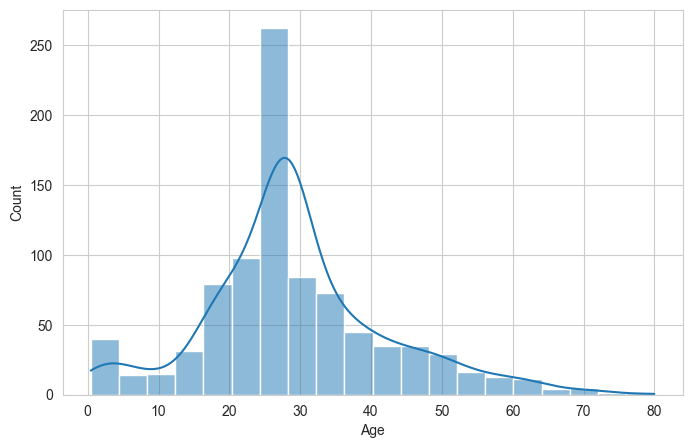

In [42]:
#age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True,bins=20)

Text(0.5, 1.0, 'Age distribution by Survival')

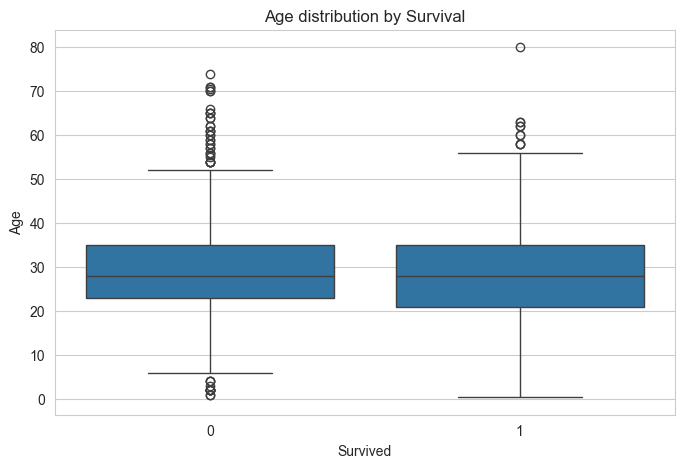

In [45]:
# age vs survival
plt.figure(figsize = (8,5))
sns.boxplot(x='Survived',y='Age',data=df)
plt.title("Age distribution by Survival")

Text(0.5, 1.0, 'Survival by Embarkation Port')

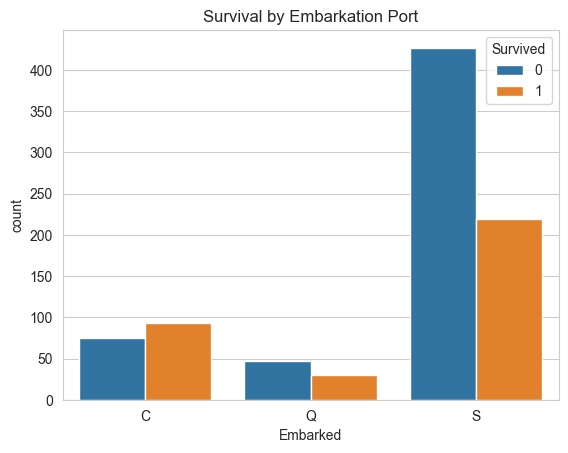

In [48]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarkation Port")


```text
Final Insights from Titanic EDA
Total passengers: 891
Survival rate: ~38%
Women had a much higher survival rate than men.
First-class passengers survived significantly more than second or third-class.
Most passengers were aged 20–40, but a few elderly passengers like the 80-year-old survived too.
People who embarked from port 'C' (Cherbourg) had better survival odds.
Fare varies wildly — higher fares seem to slightly increase survival chances.
```